# 이미지 분류

In [1]:
import matplotlib.pyplot as plt
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor  # 이미지 데이터 전처리 해주는 라이브러리
from torch.utils.data.dataloader import DataLoader # 데이터를 쪼개주는 역할
import torch
import torch.nn as nn
from torch.optim.adam import Adam

In [2]:
train_data = MNIST(root='./',train=True,download=True,transform=ToTensor())
test_data = MNIST(root='./',train=False,download=True,transform=ToTensor())

In [3]:
train_data.data.size()  # 흑백 이미지

torch.Size([60000, 28, 28])

In [4]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

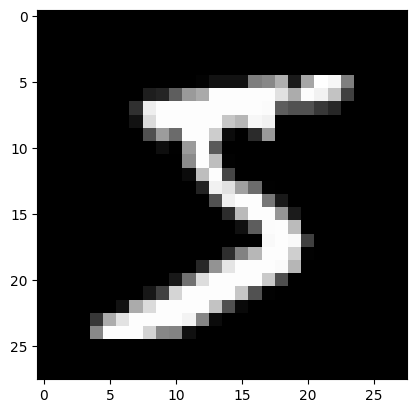

In [5]:
plt.imshow(train_data.data[0], cmap="gray")
plt.show()

In [6]:
train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32,shuffle=False)

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = nn.Sequential(
    nn.Linear(784,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

model.to(device)
model

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [8]:
next(iter(train_loader))[1]

tensor([7, 8, 3, 0, 7, 5, 6, 7, 9, 7, 2, 7, 9, 6, 0, 0, 9, 6, 9, 2, 7, 0, 8, 0,
        4, 4, 7, 1, 3, 4, 5, 9])

In [9]:
from tensorboardX import SummaryWriter
writer = SummaryWriter()

lr = 1e-3
criterion = nn.CrossEntropyLoss()
optim = Adam(model.parameters(), lr=lr)
epochs = 20

step = 0
for epoch in range(20):
    for data,label in train_loader:    #  [(데이터,정답),()]
        optim.zero_grad()
        data = torch.reshape(data,(-1,784))
        #data = data.view(-1,784)
        pred = model(data.to(device))
        loss = criterion(pred, label.to(device))
        writer.add_scalar('Loss/train',loss.item(), step )
        step = step + 1
        loss.backward()
        optim.step()
    
    print(f'{epoch+1} loss : {loss.item()}')

1 loss : 0.1278621405363083
2 loss : 0.24729256331920624
3 loss : 0.09060094505548477
4 loss : 0.2294323444366455
5 loss : 0.1704796999692917
6 loss : 0.09247873723506927
7 loss : 0.032108474522829056
8 loss : 0.0049341400153934956
9 loss : 0.014644070528447628
10 loss : 0.011759273707866669
11 loss : 0.0676087811589241
12 loss : 0.002076497534289956
13 loss : 0.014661617577075958
14 loss : 0.003704975126311183
15 loss : 0.0076707578264176846
16 loss : 0.001738682622089982
17 loss : 0.0019514351151883602
18 loss : 0.0005520647973753512
19 loss : 0.0004934737225994468
20 loss : 0.0014220166485756636


# 검증

In [10]:
model.eval()

with torch.no_grad():
    total_corr  = 0
    for images, labels in test_loader:
        #print(images.shape)
        images = images.view(-1,784).to(device)
        labels = labels.to(device)
    
        preds = model(images)

        _,pred = torch.max(preds.data,1)
        total_corr = total_corr + (pred==labels).sum().item()
        


print('정확도 : ', total_corr/len(test_data.targets))
        

정확도 :  0.9772


In [11]:
print(images.shape)

torch.Size([16, 784])


In [12]:
pred.data.shape

torch.Size([16])

In [13]:
_, pred = torch.max(preds.data, 1)
pred

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6], device='cuda:0')

In [14]:
labels

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6], device='cuda:0')

In [15]:
(pred == labels).sum()

tensor(16, device='cuda:0')

In [16]:
data = next(iter(train_loader))[0]
data.shape

torch.Size([32, 1, 28, 28])

In [17]:
next(iter(train_loader))[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [18]:
next(iter(train_loader))[0].shape

torch.Size([32, 1, 28, 28])

In [19]:
torch.save(model.state_dict(), "num_model.pth")